In [1]:
import kagglehub
import os
import shutil

# Define the dataset and paths
dataset_name = "muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten"
local_download_path = kagglehub.dataset_download(dataset_name)
apple_healthy_path = os.path.join(local_download_path, 'Fruit And Vegetable Diseases Dataset/Apple__Healthy')
apple_rotten_path = os.path.join(local_download_path, 'Fruit And Vegetable Diseases Dataset/Apple__Rotten')

# Create a directory to hold only Apple images
apple_dataset_path = os.path.join(local_download_path, 'Apple_Dataset')
os.makedirs(apple_dataset_path, exist_ok=True)

# Copy only the Apple-related folders
shutil.copytree(apple_healthy_path, os.path.join(apple_dataset_path, 'Apple__Healthy'))
shutil.copytree(apple_rotten_path, os.path.join(apple_dataset_path, 'Apple__Rotten'))

print("Apple dataset saved at:", apple_dataset_path)


100%|██████████| 4.77G/4.77G [03:41<00:00, 23.1MB/s]

Extracting files...


Apple dataset saved at: /root/.cache/kagglehub/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten/versions/1/Apple_Dataset


Number of healthy images: 2438
Number of rotten images: 2930


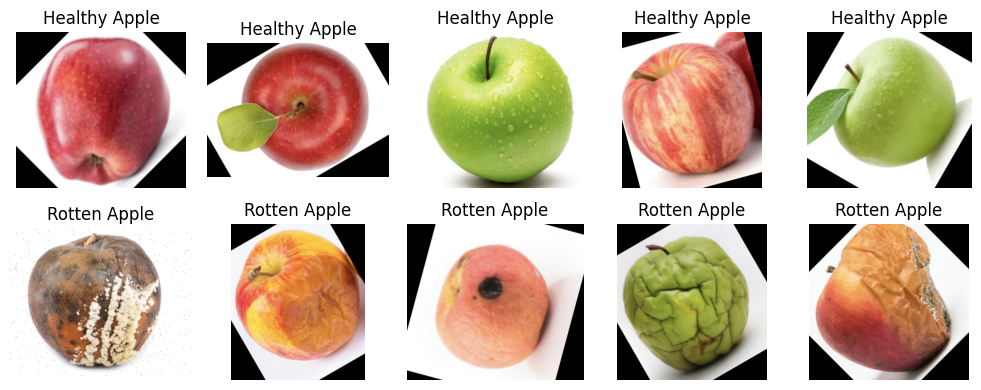

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the healthy and rotten apple datasets
healthy_path = '/root/.cache/kagglehub/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten/versions/1/Fruit And Vegetable Diseases Dataset/Apple__Healthy'
rotten_path = '//root/.cache/kagglehub/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten/versions/1/Fruit And Vegetable Diseases Dataset/Apple__Rotten'

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

# Load healthy and rotten apple images
healthy_images = load_images_from_folder(healthy_path)
rotten_images = load_images_from_folder(rotten_path)

# Print the number of images loaded
print(f"Number of healthy images: {len(healthy_images)}")
print(f"Number of rotten images: {len(rotten_images)}")

# Visualize a few images from both categories
num_images_to_display = min(5, len(healthy_images), len(rotten_images))

plt.figure(figsize=(10, 4))
for i in range(num_images_to_display):
    # Display healthy images
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(cv2.cvtColor(healthy_images[i], cv2.COLOR_BGR2RGB))
    plt.title('Healthy Apple')
    plt.axis('off')

    # Display rotten images
    plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(cv2.cvtColor(rotten_images[i], cv2.COLOR_BGR2RGB))
    plt.title('Rotten Apple')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
healthy_path = '/root/.cache/kagglehub/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten/versions/1/Fruit And Vegetable Diseases Dataset/Apple__Healthy'
rotten_path = '/root/.cache/kagglehub/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten/versions/1/Fruit And Vegetable Diseases Dataset/Apple__Rotten'

# Load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(cv2.resize(img, (224, 224)))  # Resize to match model input
            labels.append(label)
    return images, labels

# Load healthy and rotten images
healthy_images, healthy_labels = load_images_from_folder(healthy_path, 0)  # 0 for healthy
rotten_images, rotten_labels = load_images_from_folder(rotten_path, 1)  # 1 for rotten

# Combine the data
X = np.array(healthy_images + rotten_images)
y = np.array(healthy_labels + rotten_labels)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Create ImageDataGenerators for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 321ms/step - accuracy: 0.6649 - loss: 0.7675 - val_accuracy: 0.8277 - val_loss: 0.3788
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 283ms/step - accuracy: 0.8281 - loss: 0.4042 - val_accuracy: 0.8389 - val_loss: 0.3364
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - accuracy: 0.8370 - loss: 0.3693 - val_accuracy: 0.8585 - val_loss: 0.3011
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 282ms/step - accuracy: 0.8682 - loss: 0.3128 - val_accuracy: 0.8622 - val_loss: 0.2890
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 280ms/step - accuracy: 0.8706 - loss: 0.3179 - val_accuracy: 0.8743 - val_loss: 0.2785
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 280ms/step - accuracy: 0.8764 - loss: 0.2932 - val_accuracy: 0.8762 - val_loss: 0.2756
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 282ms/step - accuracy: 0.8735 - loss: 0.2869 - val_accuracy: 0.8911 - val_loss: 0.2385
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - accuracy: 0.8959 - loss: 0.2554 - val

In [10]:
model.save("Food.h5")

In [7]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9330 - loss: 0.1357
Validation Accuracy: 0.94


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
Rotten detected


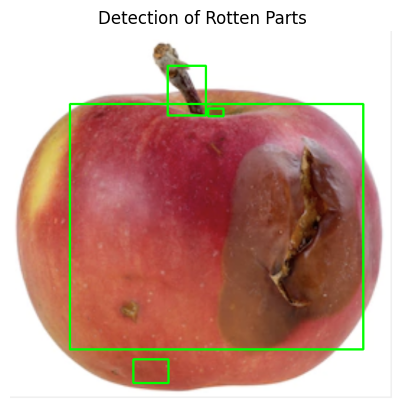

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

model = load_model('Food.h5')

def detect_rotten_parts(image):
    img_resized = cv2.resize(image, (224, 224)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)
    prediction = model.predict(img_input)
    if prediction[0] > 0.5:  # 1 indicates rotten
        print("Rotten detected")

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            if cv2.contourArea(contour) > 100:
                (x, y, w, h) = cv2.boundingRect(contour)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    else:
        print("Healthy detected.")

    return image
sample_image_path = "/root/.cache/kagglehub/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten/versions/1/Apple_Dataset/Apple__Rotten/Screen Shot 2018-06-07 at 2.15.50 PM.png"
sample_image = cv2.imread(sample_image_path)

output_image = detect_rotten_parts(sample_image)

output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.imshow(output_image_rgb)
plt.title("Detection of Rotten Parts")
plt.axis('off')
plt.show()


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on validation set
y_pred = (model.predict(X_val) > 0.5).astype("int32").flatten()

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Validation Accuracy: 0.94
Precision: 0.96
Recall: 0.93
F1 Score: 0.94


In [14]:
!pip install google-colab

from google.colab import drive

# Attempt to mount Google Drive
try:
    drive.mount('/content/drive')
except Exception as e:
    print(f"An error occurred: {e}")
    print("Try the following steps:")
    print("1. Restart the runtime ('Runtime' -> 'Restart runtime')")
    print("2. Clear your browser's cache and cookies")
    print("3. Check your network connection")
    print("4. Try running this code in an incognito window")
    print("5. If all else fails, try a factory reset ('Runtime' -> 'Factory reset runtime')")

# Rest of your code
import shutil

# Copy the saved model file to Google Drive
model_save_path = "/content/drive/MyDrive/Food.h5"
shutil.copy("Food.h5", model_save_path)

print(f"Model saved to {model_save_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.8 MB/s eta 0:00:00
Mounted at /content/drive
Model saved to /content/drive/MyDrive/Food.h5


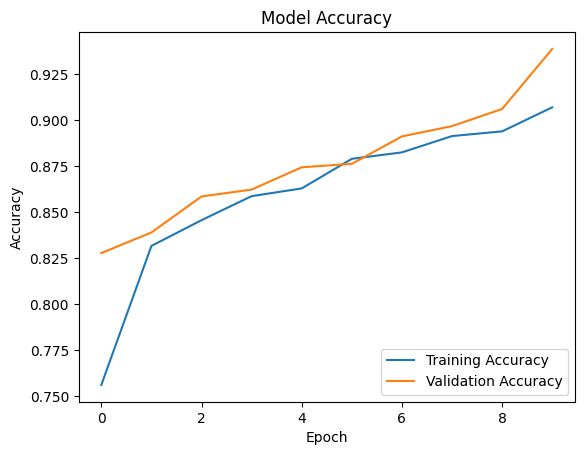

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


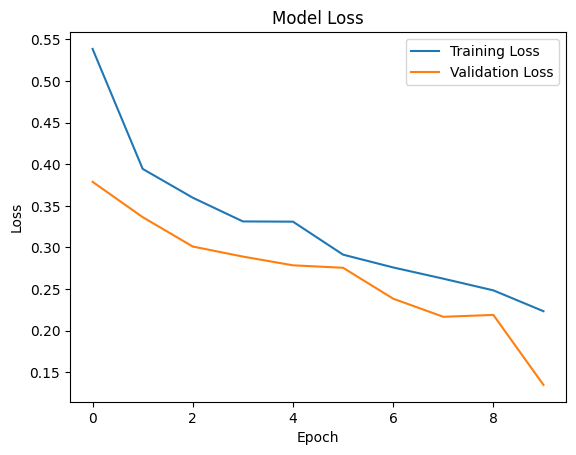

In [16]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [18]:
import time
import numpy as np

# Example to measure prediction time
times = []
for img in X_val[:100]:  # Adjust number of images as needed
    start_time = time.time()
    _ = model.predict(np.expand_dims(img, axis=0))
    times.append(time.time() - start_time)

avg_detection_time = np.mean(times)
print(f"Average detection time per image: {avg_detection_time:.4f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━